In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [54]:
! python3 -m pip install --upgrade pip
! python3 -m pip install konlpy 
! bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
! pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 87.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 54.8 MB/s eta 0:00:00
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1381k  100 1381k    0     0   422k      0  0:00:03  0:00:03 --:--:--  614k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/example.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.c
mecab-0.996-ko-0.9.2/example/example.c
mecab-0.996-ko-0.9.2/example/thread_test.cpp
mecab-0.996-ko-0.9.2/mecab-config.

In [55]:
!pip install mecab-python3
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 31.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import MeCab
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

mecab= MeCab.Tagger()

In [26]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
path='/content/drive/MyDrive/Colab Notebooks/data/csv_data/'

In [28]:
train_1 = pd.read_csv(path+'train_1.csv')
train_4 = pd.read_csv(path+'train_4.csv')
train_5 = pd.read_csv(path+'train_5.csv')
test_data = pd.read_csv(path+'test_data.csv')

In [29]:
train_data = pd.concat([train_1,train_4,train_5],axis=0)
train_data=train_data.reset_index()
train_data = train_data.drop(['Unnamed: 0','index'],axis=1)
train_data

,name,reviews,score,year,month,day,label,tokenized
0,김찬호,혹시 장인기지 와이파이 오류 문제는 고칠 생각이 없으신가요 저 하나만 그런게 아니라...,1,2023,5,21,-1,"['혹시', '장인', '기지', '와이파이', '오류', '문제', '는', '고..."
1,아아,음 오랜만에 설치해서 잘 쓰고 있었는데 이번 업데이트 이후로 앱 들어가고 로딩 퍼 ...,1,2023,5,22,-1,"['음', '오랜', '만', '에', '설치', '해서', '잘', '쓰고', '..."
2,방천화극,이번 업데이트후 그동안 사용하던 부캐 두개를 연동하지 못하고 있네요 인증번호 자리를...,1,2022,12,18,-1,"['이번', '업데이트', '후', '그동안', '사용', '하던', '부캐', '..."
3,멍멍궁,이번 업데이트 후에 장인기지 하면 스테이지 플레이 중간에 접속오류 뜨며 팅겨서 스테...,1,2023,5,21,-1,"['이번', '업데이트', '후', '에', '장인', '기지', '하면', '스테..."
4,홍구와홍철 (홍구와홍철),장인 기지가 업데이트 이후 훨씬 재미 없어졌습니다 본사에서 안 볼 확률이 높겠지만 ...,1,2023,5,15,-1,"['장인', '기지', '가', '업데이트', '이후', '훨씬', '재미', '없..."
...,...,...,...,...,...,...,...,...
330497,김민서,뉘,5,2021,2,6,1,['뉘']
330498,무적의4남매tv,NaN,5,2023,2,24,1,['nan']
330499,이찬민,NaN,5,2023,5,18,1,['nan']
330500,김혜민,NaN,5,2022,6,6,1,['nan']


In [30]:
stop = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/review_data/불용어.txt')
stop = stop.to_dict()
stop = stop['아']
stopwords=list(stop.values())
stopwords

['휴',
 '아이구',
 '아이쿠',
 '아이고',
 '어',
 '나',
 '우리',
 '저희',
 '따라',
 '의해',
 '을',
 '를',
 '에',
 '의',
 '가',
 '으로',
 '로',
 '에게',
 '뿐이다',
 '의거하여',
 '근거하여',
 '입각하여',
 '기준으로',
 '예하면',
 '예를 들면',
 '예를 들자면',
 '저',
 '소인',
 '소생',
 '저희',
 '지말고',
 '하지마',
 '하지마라',
 '다른',
 '물론',
 '또한',
 '그리고',
 '비길수 없다',
 '해서는 안된다',
 '뿐만 아니라',
 '만이 아니다',
 '만은 아니다',
 '막론하고',
 '관계없이',
 '그치지 않다',
 '그러나',
 '그런데',
 '하지만',
 '든간에',
 '논하지 않다',
 '따지지 않다',
 '설사',
 '비록',
 '더라도',
 '아니면',
 '만 못하다',
 '하는 편이 낫다',
 '불문하고',
 '향하여',
 '향해서',
 '향하다',
 '쪽으로',
 '틈타',
 '이용하여',
 '타다',
 '오르다',
 '제외하고',
 '이 외에',
 '이 밖에',
 '하여야',
 '비로소',
 '한다면 몰라도',
 '외에도',
 '이곳',
 '여기',
 '부터',
 '기점으로',
 '따라서',
 '할 생각이다',
 '하려고하다',
 '이리하여',
 '그리하여',
 '그렇게 함으로써',
 '하지만',
 '일때',
 '할때',
 '앞에서',
 '중에서',
 '보는데서',
 '으로써',
 '로써',
 '까지',
 '해야한다',
 '일것이다',
 '반드시',
 '할줄알다',
 '할수있다',
 '할수있어',
 '임에 틀림없다',
 '한다면',
 '등',
 '등등',
 '제',
 '겨우',
 '단지',
 '다만',
 '할뿐',
 '딩동',
 '댕그',
 '대해서',
 '대하여',
 '대하면',
 '훨씬',
 '얼마나',
 '얼마만큼',
 '얼마큼',
 '남짓',
 '여',
 '얼마간',
 '약간',
 '다소',
 '좀',
 '조금',
 '

In [31]:
import ast
train_data['tokenized'] = train_data['tokenized'].apply(ast.literal_eval)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [word for word in x if word not in stopwords])
test_data['tokenized'] = test_data['tokenized'].apply(ast.literal_eval)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [word for word in x if word not in stopwords])

In [84]:
import numpy as np
import pandas as pd
import re
import json
#from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

okt=Okt()

In [33]:
negative_words = np.hstack(train_data[train_data.label == -1]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [34]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('게임', 22059), ('도', 15483), ('안', 11657), ('는', 11437), ('은', 10755), ('진짜', 8824), ('만', 8772), ('레벨', 8656), ('너무', 8518), ('현질', 7309), ('다', 6579), ('요', 6403), ('매칭', 5833), ('못', 5745), ('하고', 5663), ('개', 5200), ('고', 5110), ('사람', 5085), ('거', 5075), ('인데', 5073)]


In [35]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('게임', 50910), ('도', 36568), ('너무', 33895), ('요', 24823), ('은', 22859), ('는', 20478), ('다', 17095), ('안', 16006), ('만', 15665), ('재미', 13671), ('정말', 13296), ('성', 12650), ('거', 12078), ('많이', 11611), ('진짜', 11402), ('하고', 11333), ('입니다', 10965), ('잘', 10612), ('중독', 10259), ('한', 9857)]


긍정 리뷰의 평균 길이 : 9.383410927617708
부정 리뷰의 평균 길이 : 19.378242502531158


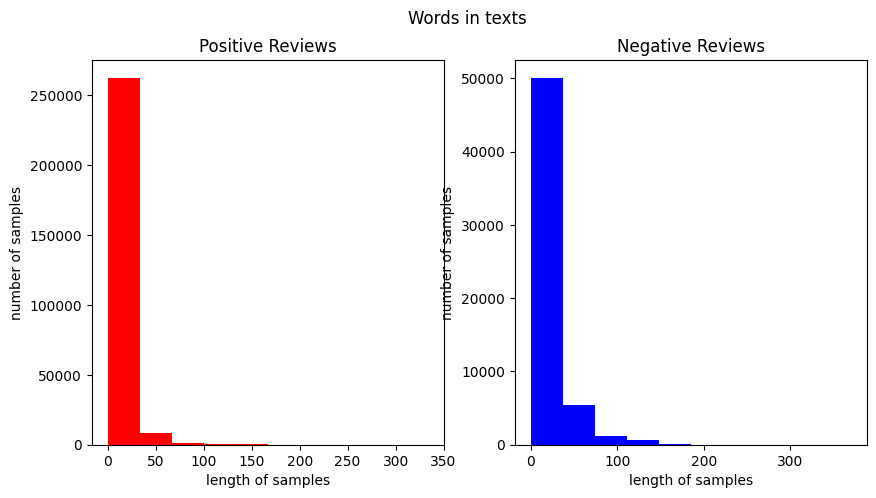

In [36]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==-1]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [37]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values 

In [68]:
print(y_train)

[-1 -1 -1 ...  1  1  1]


In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [39]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 148685
등장 빈도가 1번 이하인 희귀 단어의 수: 88381
단어 집합에서 희귀 단어의 비율: 59.441772875542256
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.405710708258479


In [40]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 60306


In [41]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [42]:
print(X_train[:3])

[[236, 709, 126, 163, 140, 6, 4594, 81, 8211, 323, 9, 2446, 488, 326, 30, 261, 76, 245, 102, 121, 714, 76, 4896, 268, 26, 13, 4896, 6, 7684, 26, 59, 112, 20, 4846, 96, 33, 600, 1400, 810, 25033, 4594, 81, 18965], [377, 275, 9, 241, 59, 23, 792, 650, 33, 373, 365, 2140, 406, 1125, 5549, 133, 1706, 7, 161, 225, 241, 3, 622, 9043, 338, 600, 2403, 2147, 41, 25034], [33, 225, 2344, 327, 734, 2716, 285, 22, 353, 139, 26, 13, 273, 1143, 997, 2461, 15519, 3210, 1676, 970, 1281, 348, 686, 5475, 136, 1935, 6859, 2, 28, 353, 26, 59, 6736, 14039, 97, 9044, 372, 2296, 33, 3787, 2717, 18966, 442, 2717]]


In [105]:
print(X_test[:3])
print(len(X_test))

[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0  8842]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
     14  4340  3310     2 23611    41  4247  2818   157     7    12    11
     77    41    26     1    11     2 16441  1138  4567    81  1626   237]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     

리뷰의 최대 길이 : 370
리뷰의 평균 길이 : 11.11581775601963


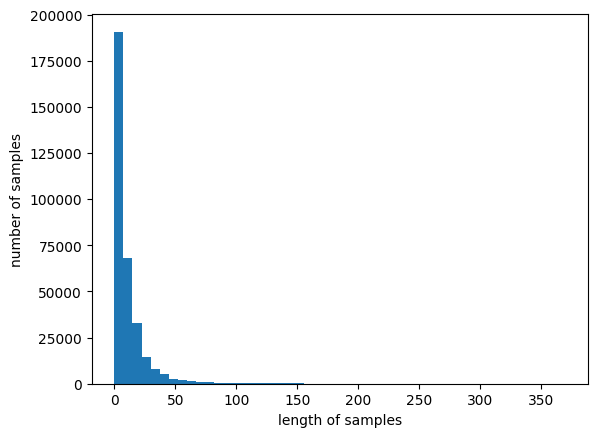

In [44]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [45]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [46]:
max_len = 60
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 60 이하인 샘플의 비율: 98.21846766434092


In [47]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [48]:
import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(hidden_units))) # Bidirectional LSTM을 사용
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, callbacks=[es, mc], batch_size=4, validation_split=0.2)

Epoch 1/4
66098/66101 [============================>.] - ETA: 0s - loss: -13.1072 - acc: 0.7102
Epoch 1: val_acc improved from -inf to 0.60926, saving model to best_model.h5
66101/66101 [==============================] - 582s 9ms/step - loss: -13.1037 - acc: 0.7102 - val_loss: -112.3646 - val_acc: 0.6093
Epoch 2/4
66097/66101 [============================>.] - ETA: 0s - loss: -66.6348 - acc: 0.6976
Epoch 2: val_acc did not improve from 0.60926
66101/66101 [==============================] - 562s 8ms/step - loss: -66.6282 - acc: 0.6976 - val_loss: -289.2357 - val_acc: 0.4939
Epoch 3/4
66097/66101 [============================>.] - ETA: 0s - loss: -143.9112 - acc: 0.6989
Epoch 3: val_acc did not improve from 0.60926
66101/66101 [==============================] - 564s 9ms/step - loss: -143.9264 - acc: 0.6989 - val_loss: -538.9142 - val_acc: 0.5745
Epoch 4/4
66101/66101 [==============================] - ETA: 0s - loss: -248.2562 - acc: 0.7058
Epoch 4: val_acc did not improve from 0.60926
6

In [49]:
loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

992/992 [==============================] - 4s 4ms/step - loss: -36.4289 - acc: 0.7243
테스트 정확도: 0.7243


In [100]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  print(new_sentence)
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [101]:
sentiment_predict('노잼 ..완전 재미 없음')

['노잼', '완전', '재미', '없음']
1/1 [==============================] - 0s 23ms/step
99.98% 확률로 긍정 리뷰입니다.


In [102]:
sentiment_predict('친구야 사랑해')

['친구', '사랑', '해']
1/1 [==============================] - 0s 24ms/step
92.14% 확률로 긍정 리뷰입니다.


In [103]:
sentiment_predict("이번에 새로 나온 아이템 나오고 재미가 없더라")

['새로', '나온', '아이템', '나오고', '재미', '없더라']
1/1 [==============================] - 0s 22ms/step
99.59% 확률로 긍정 리뷰입니다.


In [104]:
sentiment_predict('바보야')

['바보']
1/1 [==============================] - 0s 25ms/step
98.99% 확률로 긍정 리뷰입니다.


In [110]:
sentiment_predict('긍정 리뷰')

['긍정', '리뷰']
1/1 [==============================] - 0s 23ms/step
61.67% 확률로 긍정 리뷰입니다.


In [106]:
# 날짜 Merge
from datetime import datetime
def time_merge(col_1, col_2, col_3):
    result = str(col_1)
    result += "-" + str(col_2)+"-"+str(col_3)
    return result

def transform_datetype(df):
    df['Time'] = pd.to_datetime(df['Time'])
    return df

train_data["Time"] = train_data.apply(lambda x: time_merge(x['year'], x['month'],x['day']), axis=1)
train_data = transform_datetype(train_data)
train_data

,name,reviews,score,year,month,day,label,tokenized,Time
0,김찬호,혹시 장인기지 와이파이 오류 문제는 고칠 생각이 없으신가요 저 하나만 그런게 아니라...,1,2023,5,21,-1,"[장인, 기지, 와이파이, 오류, 문제, 는, 고칠, 생각, 없으신, 가요, 만, ...",2023-05-21
1,아아,음 오랜만에 설치해서 잘 쓰고 있었는데 이번 업데이트 이후로 앱 들어가고 로딩 퍼 ...,1,2023,5,22,-1,"[음, 오랜, 만, 설치, 해서, 잘, 쓰고, 있었는데, 업데이트, 이후, 앱, 들...",2023-05-22
2,방천화극,이번 업데이트후 그동안 사용하던 부캐 두개를 연동하지 못하고 있네요 인증번호 자리를...,1,2022,12,18,-1,"[업데이트, 후, 그동안, 사용, 하던, 부캐, 두, 개, 연동, 하지, 못, 하고...",2022-12-18
3,멍멍궁,이번 업데이트 후에 장인기지 하면 스테이지 플레이 중간에 접속오류 뜨며 팅겨서 스테...,1,2023,5,21,-1,"[업데이트, 후, 장인, 기지, 하면, 스테이지, 플레이, 중간, 접속, 오류, 뜨...",2023-05-21
4,홍구와홍철 (홍구와홍철),장인 기지가 업데이트 이후 훨씬 재미 없어졌습니다 본사에서 안 볼 확률이 높겠지만 ...,1,2023,5,15,-1,"[장인, 기지, 업데이트, 이후, 재미, 없어졌습니다, 본사, 안, 볼, 확률, 높...",2023-05-15
...,...,...,...,...,...,...,...,...,...
330497,김민서,뉘,5,2021,2,6,1,[뉘],2021-02-06
330498,무적의4남매tv,NaN,5,2023,2,24,1,[nan],2023-02-24
330499,이찬민,NaN,5,2023,5,18,1,[nan],2023-05-18
330500,김혜민,NaN,5,2022,6,6,1,[nan],2022-06-06


In [ ]:
def semantic_select(df):
  pos_df = df.loc[df['label']==1]
  neg_df = df.loc[df['label']==-1]
  pos_df = pos_df.sort_values(by=['postive'],ascending=False)
  neg_df = neg_df.sort_values(by=['negative'],ascending=False)
  return pos_df, neg_df